In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import * 

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)


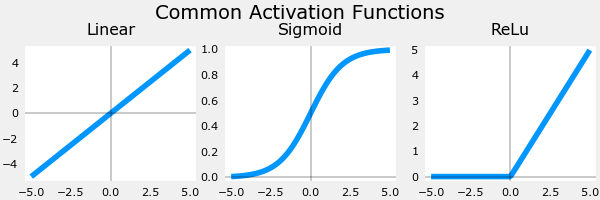

In [3]:
#Activation functions

plt_act_trio()

In [13]:

def my_softmax(z):  
    a = np.exp(z) /  np.sum(np.exp(z))
    return a

In [17]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

test_my_softmax(my_softmax)

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
 All tests passed.


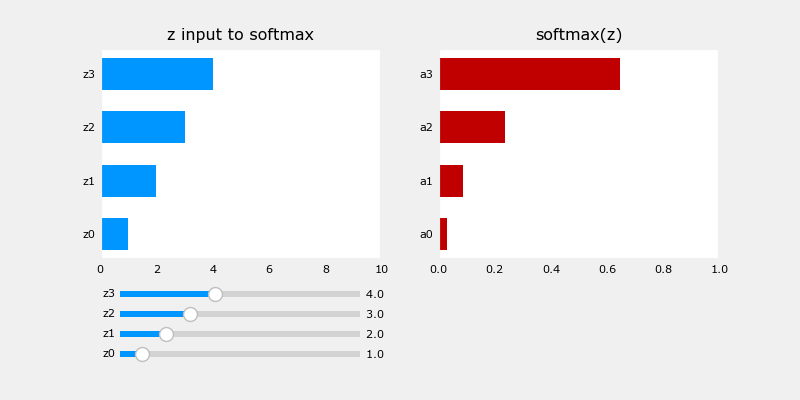

In [18]:
plt.close("all")
plt_softmax(my_softmax)

# Neural Network for Multiclass Digits Classification


In [22]:
#Loading dataset

X, y = load_data()


(5000, 1)

In [23]:
#Examining the data

print ('The first element of X is: ', X[0])
print ('The first element of y is: ', y[0,0]) #0
print ('The last element of y is: ', y[-1,0]) #9

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [26]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


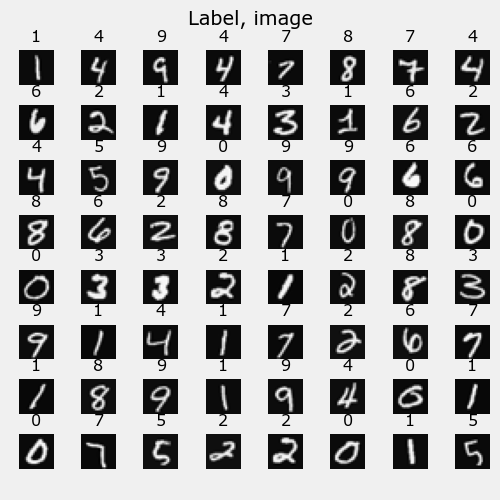

In [32]:
#Visualizing the data

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

widgvis(fig)
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    #Display the image
    
    ax.imshow(X_random_reshaped, cmap='gray')
    
    #Display the labels
    
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)


In [39]:
#Model representation

tf.random.set_seed(1234) #for consistent resutls

model = Sequential(
    [
        tf.keras.Input(shape=(400,)),     
        Dense(25, activation = 'relu', name = "L1"),
        Dense(15, activation = 'relu', name = "L2"),
        Dense(10, activation = 'linear', name = "L3")
    ], name = "my_model"
)

In [40]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 25)                10025     
_________________________________________________________________
L2 (Dense)                   (None, 15)                390       
_________________________________________________________________
L3 (Dense)                   (None, 10)                160       
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [41]:
# BEGIN UNIT TEST     
test_model(model, 10, 400)
# END UNIT TEST     

All tests passed!


In [42]:
#Weights examination

[layer1, layer2, layer3] = model.layers

In [45]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [49]:
#Training the model

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
)

history = model.fit(
    X, y, epochs = 40
)

#Note: 5000 training examples are splited into 157 batches (32 examples per batch)

Epoch 1/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 13/40
157/157 [====

In [51]:
plot_loss_tf(history)

NameError: name 'plot_loss_tf' is not defined

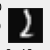

Predicting a Two:  [[-12.3   -3.23   2.13  -3.37 -22.93 -15.1  -17.68  -8.48  -9.55 -13.03]]
Largest Prediction index:  2


In [54]:
#Prediction

image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400)) 

print("Predicting a Two: ", prediction) #All 10 digits
print("Largest Prediction index: ", np.argmax(prediction))

In [56]:
#Using softmax for probability

prediction_p = tf.nn.softmax(prediction)

print(f"Predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

Predicting a Two. Probability vector: 
[[5.35e-07 4.65e-03 9.91e-01 4.03e-03 1.29e-11 3.24e-08 2.46e-09 2.44e-05
  8.35e-06 2.58e-07]]
Total of predictions: 1.000


In [62]:
#Getting the index of largest probability

yhat = np.argmax(prediction_p)
print(f"np.argmax(prediction_p):{yhat}")

np.argmax(prediction_p):3


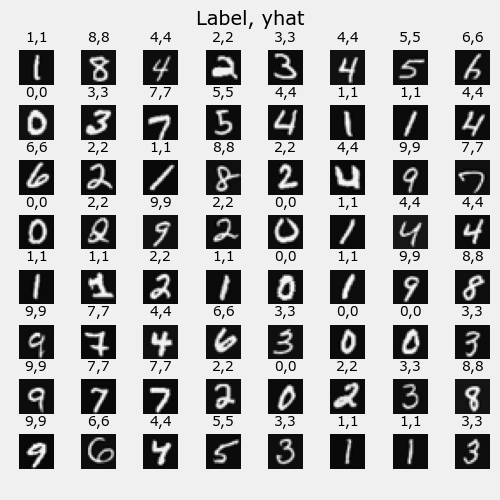

In [59]:
#Comparing the results

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [63]:
#Display the errors

print(f"{display_errors(model,X,y)} errors out of {len(X)} images.")

no errors found
0 errors out of 5000 images.
